# <center> Exercise 08

### Import required libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from utils import info_data

### Read data

In [2]:
data = pd.read_csv('flights.csv')

In [3]:
info_data(data)

Show dataset:
                                    0                      1
id                                  0                      1
year                             2013                   2013
month                               1                      1
day                                 1                      1
dep_time                        517.0                  533.0
sched_dep_time                    515                    529
dep_delay                         2.0                    4.0
arr_time                        830.0                  850.0
sched_arr_time                    819                    830
arr_delay                        11.0                   20.0
carrier                            UA                     UA
flight                           1545                   1714
tailnum                        N14228                 N24211
origin                            EWR                    LGA
dest                              IAH                    IAH
air_time  

#### Explanation for each feature in the flight dataset:

- id: A unique identifier for each flight record in the dataset.
- year: The year in which the flight took place (2013 in this dataset).
- month: The month in which the flight took place (1 to 12).
- day: The day of the month on which the flight took place (1 to 31).
- dep_time: The actual departure time of the flight (in local time, hhmm format).
- sched_dep_time: The scheduled departure time of the flight (in local time, hhmm format).
- dep_delay: The difference between the actual departure time and the scheduled departure time (in minutes). A positive value indicates a delayed departure, while a negative value indicates an early departure.
- arr_time: The actual arrival time of the flight (in local time, hhmm format).
- sched_arr_time: The scheduled arrival time of the flight (in local time, hhmm format).
- arr_delay: The difference between the actual arrival time and the scheduled arrival time (in minutes). A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
- carrier: The two-letter code of the airline carrier for the flight.
- flight: The flight number of the flight.
- tailnum: The tail number of the aircraft used for the flight.
- origin: The airport code of the origin airport for the flight.
- dest: The airport code of the destination airport for the flight.
- air_time: The duration of the flight (in minutes).
- distance: The distance between the origin and destination airports (in miles).
- hour: The hour component of the scheduled departure time (in local time).
- minute: The minute component of the scheduled departure time (in local time).
- time_hour: The scheduled departure time of the flight (in local time, yyyy-mm-dd hh:mm:ss format).
- name: The name of the airline carrier for the flight.

### Replace the 'id' column with the index

In [4]:
data = data.set_index('id')

In [5]:
# Drop columns
data = data.drop('year', axis = 1)
data = data.drop('flight', axis = 1)
data = data.drop('hour', axis = 1)
data = data.drop('minute', axis = 1)
data = data.drop('tailnum', axis = 1)
data = data.drop('time_hour', axis = 1)

## Imputer Phase:

I used three methods to fill the null data, including average, KNearestNeighbor, and most frequency, and I ploted the effect of each of these methods. Finally, I chose the average method.

In [6]:
# Select the columns to impute
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time',
                     'arr_delay', 'air_time']

### Simple imputer: Mean

In [7]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the selected columns
si.fit(data[columns_to_impute])

# Impute the missing values
data[columns_to_impute] = si.transform(data[columns_to_impute])

### Comparison between imputer methods:

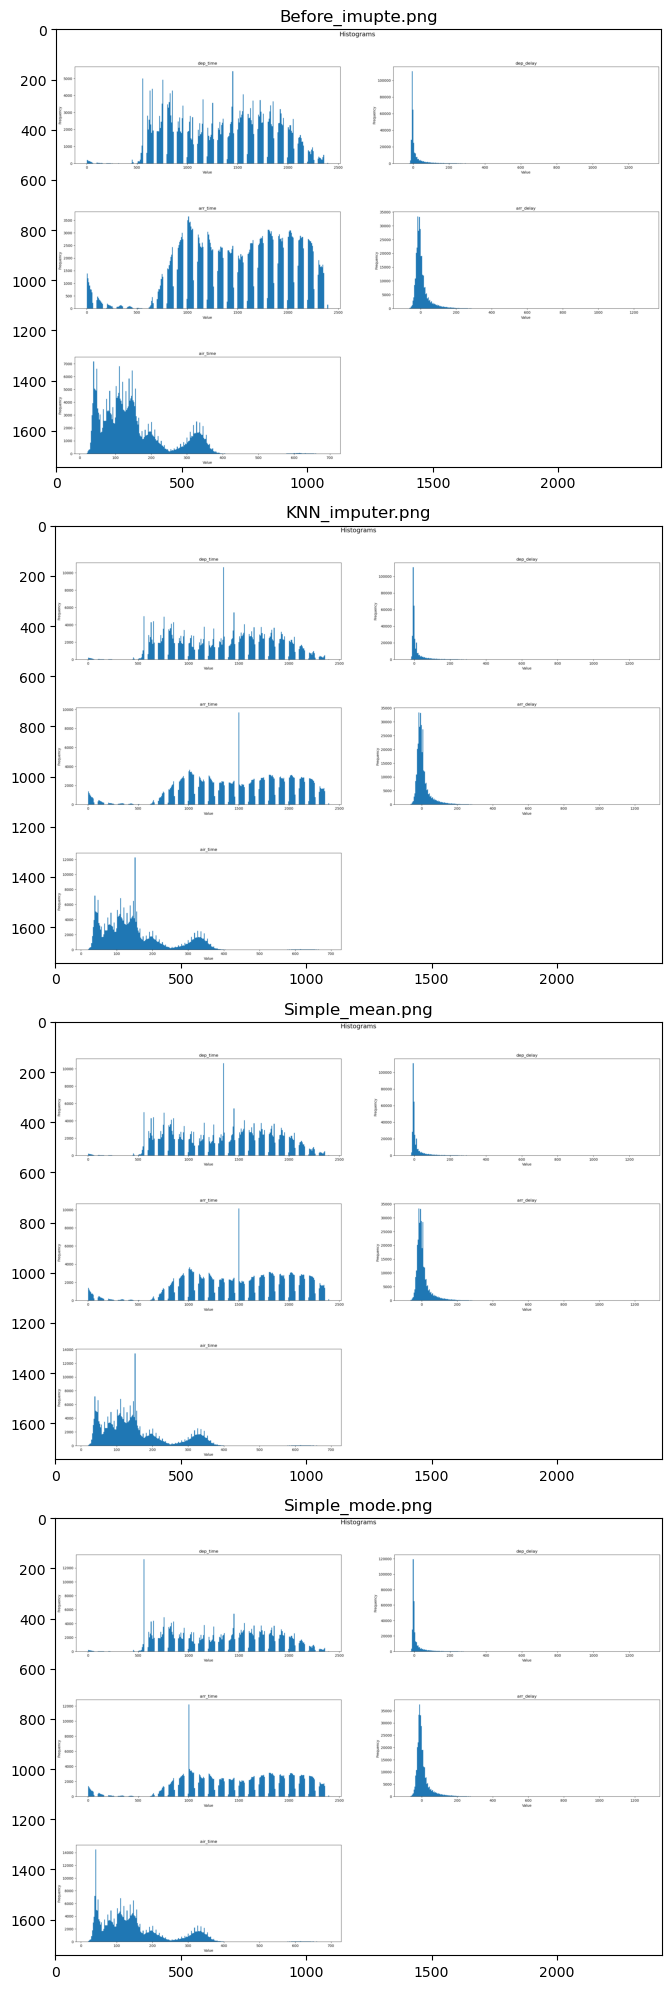

In [8]:
# Path to the folder containing the images
path_to_folder = "figures/"

# Get a list of all the image files in the folder
image_files = [os.path.join(path_to_folder, f) for f in os.listdir(path_to_folder) if f.endswith('.png')]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# Loop through the image files and plot each one in a separate subplot
for i, ax in enumerate(axs.flatten()):
    if i < len(image_files):
        img = plt.imread(image_files[i])
        ax.imshow(img)
        ax.set_title(os.path.basename(image_files[i]))
    else:
        ax.axis('off')

# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
info_data(data)

Show dataset:
id                                  0                      1
month                               1                      1
day                                 1                      1
dep_time                        517.0                  533.0
sched_dep_time                    515                    529
dep_delay                         2.0                    4.0
arr_time                        830.0                  850.0
sched_arr_time                    819                    830
arr_delay                        11.0                   20.0
carrier                            UA                     UA
origin                            EWR                    LGA
dest                              IAH                    IAH
air_time                        227.0                  227.0
distance                         1400                   1416
name            United Air Lines Inc.  United Air Lines Inc.
++++++++++++++++++++++++++++++++++++++++++++++++++
Informations:
<class

## Label Encoder Phase

In [10]:
# In this example, we'll use LabelEncoder to convert 'carrier', 'origin', and 'dest' to numeric labels.
categorical_columns = ['carrier', 'origin', 'dest', 'name']
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [11]:
data.head().T

id,0,1,2,3,4
month,1.0,1.0,1.0,1.0,1.0
day,1.0,1.0,1.0,1.0,1.0
dep_time,517.0,533.0,542.0,544.0,554.0
sched_dep_time,515.0,529.0,540.0,545.0,600.0
dep_delay,2.0,4.0,2.0,-1.0,-6.0
arr_time,830.0,850.0,923.0,1004.0,812.0
sched_arr_time,819.0,830.0,850.0,1022.0,837.0
arr_delay,11.0,20.0,33.0,-18.0,-25.0
carrier,11.0,11.0,1.0,3.0,4.0
origin,0.0,2.0,1.0,1.0,2.0


## Scaling Phase:

We have three methods for scaling data, including StandardScaler, MinMaxScaler, Normalizer, and I ultimately used the StandardScaler method.

### Standard scaling:

In [12]:
scaler = StandardScaler()

# fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

# convert the numpy array back to a pandas dataframe
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

scaled_data.head().T

,0,1,2,3,4
month,-1.625007,-1.625007,-1.625007,-1.625007,-1.625007
day,-1.677668,-1.677668,-1.677668,-1.677668,-1.677668
dep_time,-1.725440,-1.692263,-1.673601,-1.669453,-1.648718
sched_dep_time,-1.774433,-1.744476,-1.720938,-1.710239,-1.592551
dep_delay,-0.267891,-0.217531,-0.267891,-0.343431,-0.469331
arr_time,-1.276895,-1.238895,-1.100196,-0.946297,-1.311094
sched_arr_time,-1.442097,-1.419984,-1.379780,-1.034021,-1.405913
arr_delay,0.093279,0.297806,0.593234,-0.565754,-0.724831
carrier,1.174395,1.174395,-1.243296,-0.759758,-0.517988
origin,-1.165402,1.282981,0.058789,0.058789,1.282981


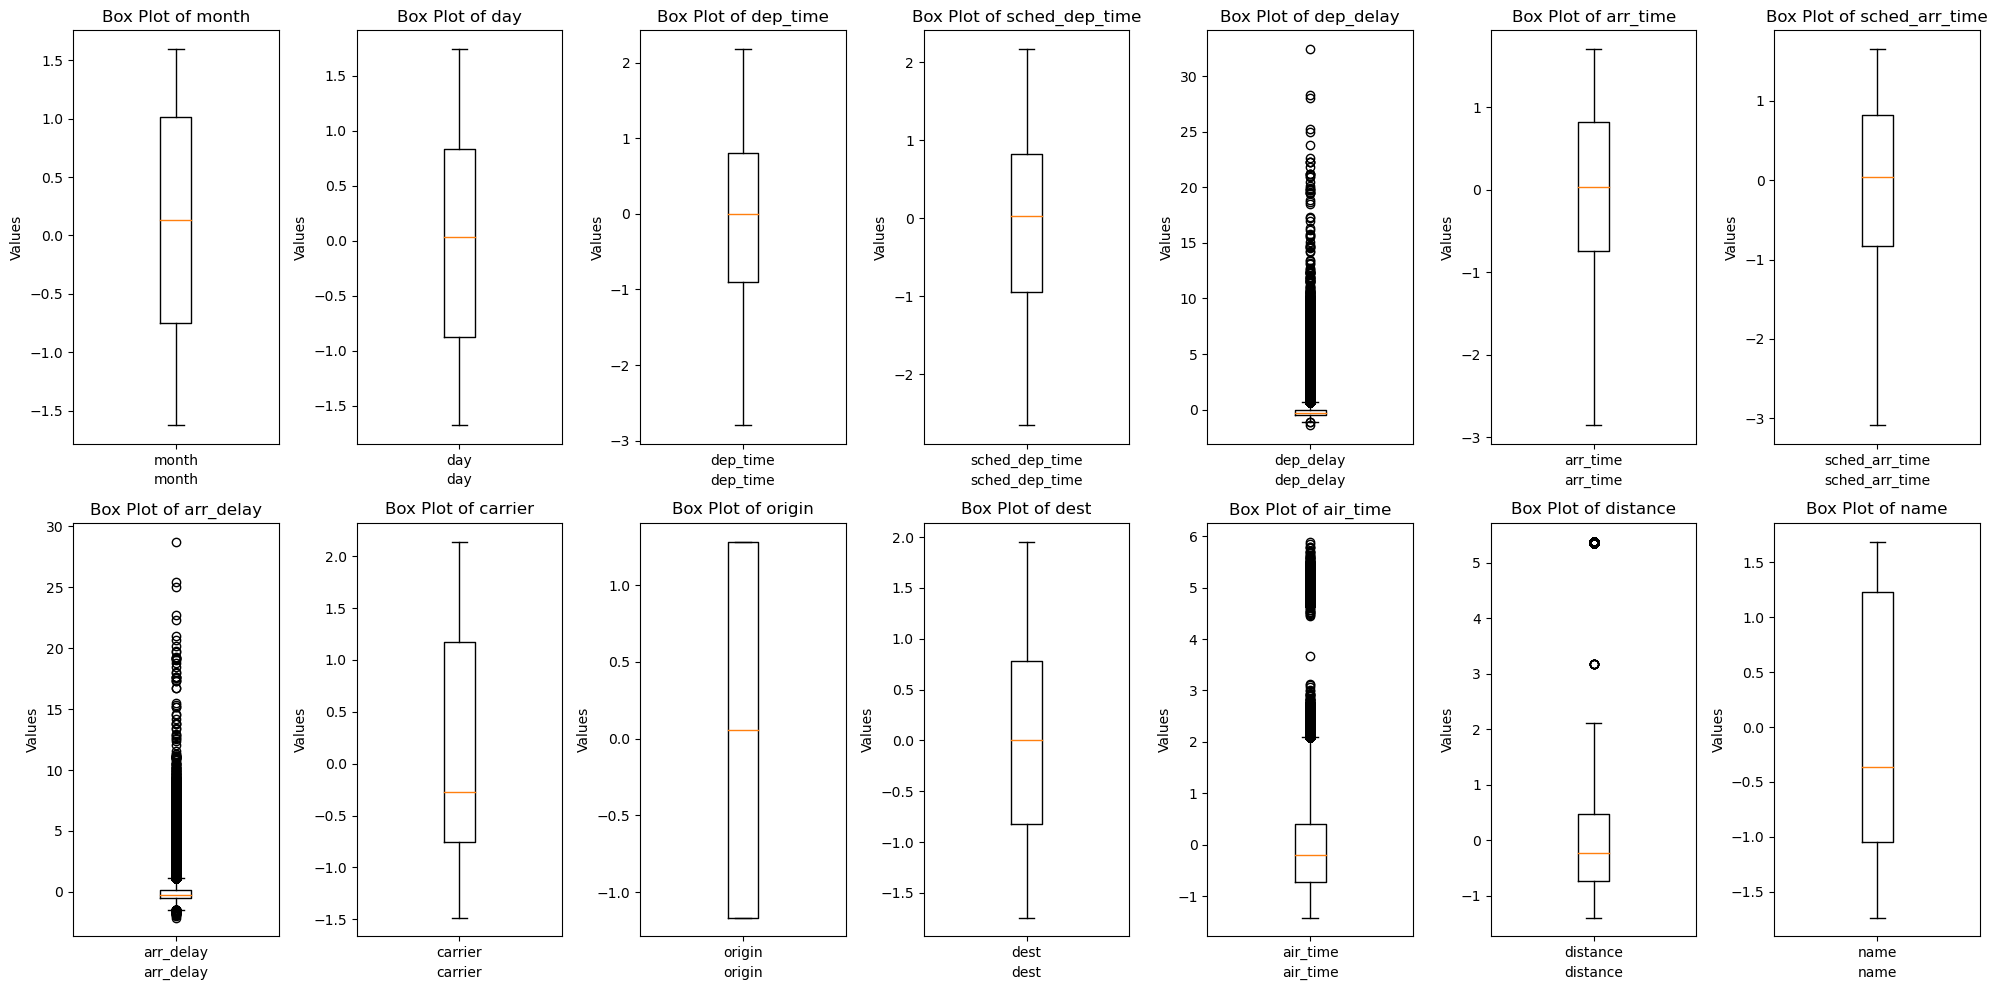

In [13]:
# Define the number of rows and columns for the subplot grid
nrows = 2
ncols = 7

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterate over the columns and plot them in separate subplots
for i, column in enumerate(scaled_data.columns):
    # Create a new subplot for each nth column
    if i % (nrows * ncols) == 0:
        fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))
        axs = axs.flatten()

    # Create a box plot for the current column in the current subplot
    axs[i % (nrows * ncols)].boxplot(scaled_data[column], labels=[column])
    axs[i % (nrows * ncols)].set_title('Box Plot of ' + column)
    axs[i % (nrows * ncols)].set_xlabel(column)
    axs[i % (nrows * ncols)].set_ylabel('Values')

# Hide any unused subplots
for j in range(len(scaled_data.columns), len(axs)):
    axs[j].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()